<a href="https://colab.research.google.com/github/LailaDuffy/WoTech_Titanic_Data/blob/main/WoTech_Titanic_data_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis (EDA):

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the Titanic dataset into a Pandas DataFrame.
data = pd.read_csv('/content/SVMtrain.csv')
df_data = pd.DataFrame(data)

# Display the first few rows to get an overview of the data structure.
df_data.head()

# Check the dimensions of the dataset (number of rows and columns).
df_data.shape

# Identify missing values and decide on strategies for handling them.
df_data.count()
df = df_data.drop(['SibSp', 'Parch'], axis=1) # removing unneccessary columns

# Compute basic statistics (e.g., mean, median, min, max) for numerical columns.
# mean Age and Fare
mean_Age = df['Age'].mean() #mean() ignores NaN
print(f'Mean of column Age is {mean_Age}')
mean_Fare = df['Fare'].mean()
print(f'Mean of column Fare is {mean_Fare}')
# median Age and Fare
median_Age = df['Age'].median() #median() ignores NaN
print(f'\nMedian of column Age is {median_Age}')
median_Fare = df['Fare'].median()
print(f'Median of column Fare is {median_Fare}')
# min Age and Fare
min_Age = df['Age'].min() #min() ignores NaN
print(f'\nMin value of column Age is {min_Age}')
min_Fare = df['Fare'].min()
print(f'Min value of column Fare is {min_Fare}')
# max Age and Fare
max_Age = df['Age'].max() #max() ignores NaN
print(f'\nMax value of column Age is {max_Age}')
max_Fare = df['Fare'].max()
print(f'Max value of column Fare is {max_Fare}')

# Analyze categorical variables (e.g., value counts).
# Age
age_df = pd.DataFrame(df['Age'].value_counts(dropna=True).reset_index())
top_5_ages = age_df.iloc[:5]
print('\nMost people on Titanic were aged:')
for index, row in top_5_ages.iterrows():
  print(f"Age: {row['Age']} - number of people: {row['count']}")
# Class
class_df = pd.DataFrame(df['Pclass'].value_counts().reset_index())
print(f"\nThe most amount of people ({class_df.iloc[0,1]}) were travelling in Class {class_df.iloc[0,0]}.")
# Embarked from
embarked_df = pd.DataFrame(df['Embarked'].value_counts(dropna=False).reset_index())
print(f"\nThere were {embarked_df.iloc[0,1]} people boarding the Titanic from {embarked_df.iloc[0,0]} (Southampton).")
print(f"There were {embarked_df.iloc[1,1]} people boarding the Titanic from {embarked_df.iloc[1,0]} (Cherbourg).")
print(f"There were {embarked_df.iloc[2,1]} people boarding the Titanic from {embarked_df.iloc[2,0]} (Queenstown).")

Mean of column Age is 35.686355455568055
Mean of column Fare is 32.09668087739032

Median of column Age is 32.0
Median of column Fare is 14.4542

Min value of column Age is 0.42
Min value of column Fare is 0.0

Max value of column Age is 80.0
Max value of column Fare is 512.3292

Most people on Titanic were aged:
Age: 60.0 - number of people: 181.0
Age: 24.0 - number of people: 30.0
Age: 22.0 - number of people: 27.0
Age: 18.0 - number of people: 26.0
Age: 28.0 - number of people: 25.0

The most amount of people (491) were travelling in Class 3.

There were 644 people boarding the Titanic from 3 (Southampton).
There were 168 people boarding the Titanic from 1 (Cherbourg).
There were 77 people boarding the Titanic from 2 (Queenstown).


##Data Visualization:

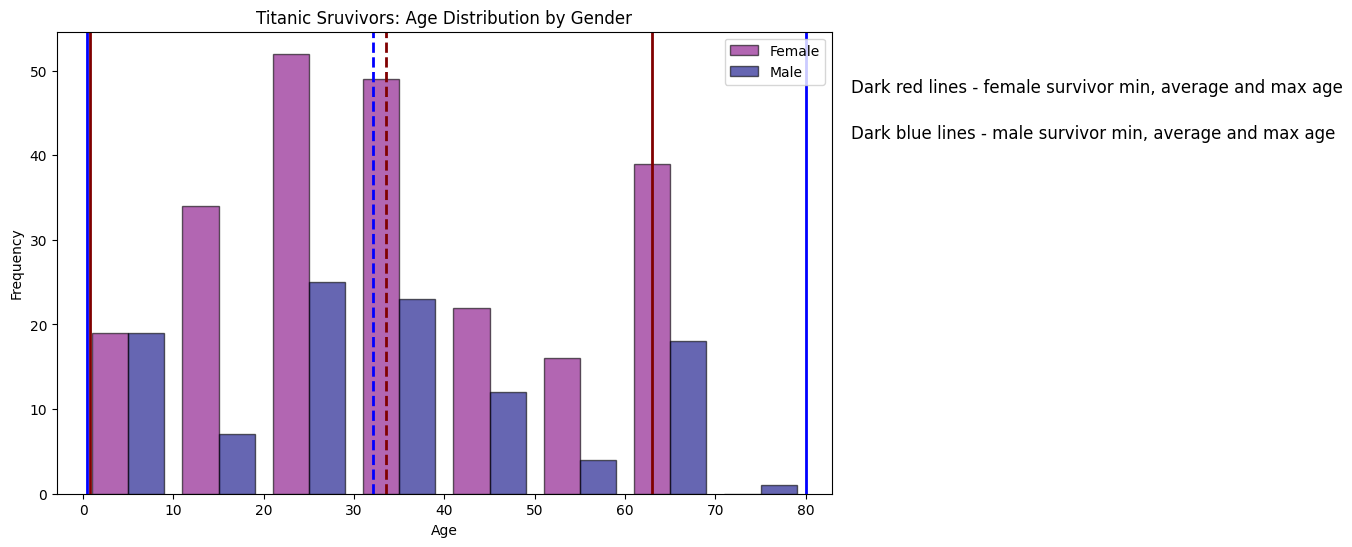

In [55]:
df_survived = df[df['Survived'] == 1]
female = df_survived[df_survived['Sex'] == 'female']['Age']
male = df_survived[df_survived['Sex'] == 'Male']['Age']

plt.figure(figsize=(10, 6))
plt.hist([female, male], bins=[0,10,20,30,40,50,60,70,80], label=['Female', 'Male'], color=['purple', 'navy'], alpha=0.6, edgecolor='black')
plt.title('Titanic Sruvivors: Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

female_mean = female.mean()
female_min = female.min()
female_max = female.max()
plt.axvline(female_mean, color='maroon', linestyle='dashed', linewidth=2, label=f'Female Mean: {female_mean:.2f}')
plt.axvline(female_min, color='maroon', linestyle='solid', linewidth=2, label=f'Female Min: {female_min}')
plt.axvline(female_max, color='maroon', linestyle='solid', linewidth=2, label=f'Female Max: {female_max}')

male_mean = male.mean()
male_min = male.min()
male_max = male.max()
plt.axvline(male_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Male Mean: {male_mean:.2f}')
plt.axvline(male_min, color='blue', linestyle='solid', linewidth=2, label=f'Male Min: {male_min}')
plt.axvline(male_max, color='blue', linestyle='solid', linewidth=2, label=f'Male Max: {male_max}')

text_str_female = 'Dark red lines - female survivor min, average and max age'
text_str_male = 'Dark blue lines - male survivor min, average and max age'
plt.text(df['Age'].max() + 5, plt.ylim()[1] * 0.9, text_str_female, fontsize=12, color='black', va='top')
plt.text(df['Age'].max() + 5, plt.ylim()[1] * 0.8, text_str_male, fontsize=12, color='black', va='top')

plt.show()

Pearson correlation coefficient between Fare and Age: -0.0033067342386509093
There is almost no correlation between the age of a passanger and how much they paid for the ticket. 


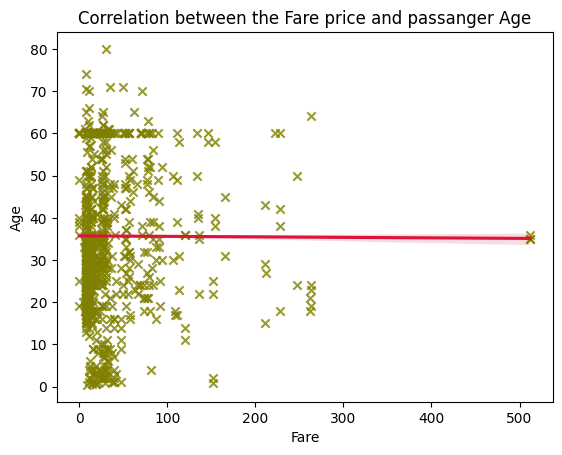

In [68]:
import seaborn as sns

corr = df['Fare'].corr(df['Age'])
print(f'Pearson correlation coefficient between Fare and Age: {corr}')

sns.regplot(x='Fare', y='Age', data=df, marker='x', color='olive', ci=25, line_kws={'color':'crimson'})
plt.title('Correlation between the Fare price and passanger Age')

print(f'There is almost no correlation between the age of a passanger and how much they paid for the ticket. ')
plt.show()
